In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import spacy
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
header = pd.read_csv(r"drive/My Drive/Colab_Notebooks/Data/key.csv",sep='\t',header=None).transpose()[0].tolist()
train = pd.read_csv(r"drive/My Drive/Colab_Notebooks/Data/train-balanced.csv",sep='\t',names = header)
test = pd.read_csv(r"drive/My Drive/Colab_Notebooks/Data/test-balanced.csv",sep='\t',names = header)

In [ ]:
header = pd.read_csv(r"C:\Users\Vipre\CA683\Assignment\key.csv",sep='\t',header=None).transpose()[0].tolist()
test = pd.read_csv(r"C:\Users\Vipre\CA683\Assignment\test-balanced.csv",sep='\t',names = header)
train = pd.read_csv(r"C:\Users\Vipre\CA683\Assignment\train-balanced.csv",sep='\t',names = header)

In [ ]:
test.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,Actually most of her supporters and sane peopl...,Quinnjester,politics,3,3,0,2016-09,1473569605,Hillary's Surrogotes Told to Blame Media for '...
1,0,They can't survive without an echo chamber whi...,TheGettysburgAddress,The_Donald,13,-1,-1,2016-11,1478788413,Thank God Liberals like to live in concentrate...
2,0,you're pretty cute yourself 1729 total,Sempiternally_free,2007scape,8,-1,-1,2016-11,1478042903,Saw this cutie training his Attack today...
3,0,If you kill me you'll crash the meme market,Catacomb82,AskReddit,2,-1,-1,2016-10,1477412597,If you were locked in a room with 49 other peo...
4,0,I bet he wrote that last message as he was sob...,Dorian-throwaway,niceguys,5,-1,-1,2016-11,1477962278,You're not even that pretty!


In [ ]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,1476662123,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,1477959850,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,1474580737,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,1476824627,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,1483117213,Yep can confirm I saw the tool they use for th...


In [ ]:
train.describe()

,label,score,ups,downs,created_utc
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01,1.438684e+09
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01,3.945812e+07
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00,1.230851e+09
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00,1.420734e+09
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00,1.448915e+09
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00,1.468588e+09
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00,1.483229e+09


In [ ]:
len(train.columns)

10

In [ ]:
len(train['label'])

1010826

In [ ]:
train.isnull().sum()

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
train.corr()

,label,score,ups,downs,created_utc
label,1.000000,-0.010028,-0.006697,0.057546,-0.057547
score,-0.010028,1.000000,0.849238,-0.013864,0.016939
ups,-0.006697,0.849238,1.000000,0.065070,-0.014934
downs,0.057546,-0.013864,0.065070,1.000000,-0.426066
created_utc,-0.057547,0.016939,-0.014934,-0.426066,1.000000


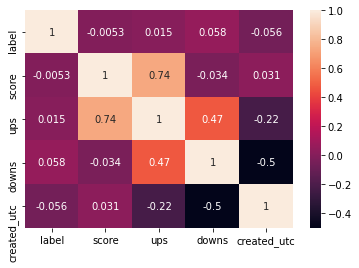

In [ ]:
corr = train.corr(method = 'kendall')
sns.heatmap(corr,annot = True)

In [ ]:
train.dropna(axis=0, how='any',inplace=True)

In [ ]:
len(train['label'])

1010773

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
#nlp.max_length = 101100

In [ ]:
#train['comment'].to_string()

In [ ]:
#train['comment'] = train['comment'].apply(spacy.token)
#train['comment'] = train['comment'].apply(lambda x: [token.lemma_(y) for y in x])

In [ ]:
train['comment'] = train.comment.map(lambda x: x.lower())

In [ ]:
train['parent_comment'] = train.parent_comment.map(lambda x: x.lower())

In [ ]:
train['comment'] = train.comment.str.replace('[^\w\s]', '')

In [ ]:
train['parent_comment'] = train.parent_comment.str.replace('[^\w\s]', '')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train['comment'] = train['comment'].apply(nltk.word_tokenize)

In [ ]:
train['parent_comment'] = train['parent_comment'].apply(nltk.word_tokenize)

In [ ]:
train['comment'] = train['comment'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
train['parent_comment'] = train['parent_comment'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
train['comment'] = train['comment'].apply(lambda x: ' '.join(x))

In [ ]:
train['parent_comment'] = train['parent_comment'].apply(lambda x: ' '.join(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vect = CountVectorizer()

In [ ]:
counts = count_vect.fit_transform(train['comment'])

In [ ]:
counts = count_vect.fit_transform(train['parent_comment'])

In [ ]:
train['subreddit'].value_counts()

AskReddit               65674
politics                39493
worldnews               26376
leagueoflegends         21034
pcmasterrace            18987
                        ...  
EXHINDU                     1
SpringfieldArmory           1
commieshowerthoughts        1
SatWcomic                   1
whatisit                    1
Name: subreddit, Length: 14876, dtype: int64

In [ ]:
train['comment'].nunique()

935313

In [ ]:

train['label'].nunique()

2

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
transformer = TfidfTransformer().fit(counts)

In [ ]:
counts = transformer.transform(counts)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(counts, train['label'], test_size=0.3,
random_state=4)

In [8]:
from sklearn.svm import SVC

In [9]:
model = SVC(verbose=True)

In [13]:
model.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [14]:
predictions = model.predict(X_test)

In [15]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
acc = metrics.accuracy_score(y_test, predictions)
print('SVC = ' + str(acc * 100) + '%')

SVC = 61.37766081871345%


In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))